In [2]:
import os
import re
import torch
import matplotlib.pyplot as plt

import sys
sys.path.append('..')

from src.utils.model import *
from src.utils.dataset import *
from src.utils.visualization import *
from src.utils.driver import *

## N exp plots

In [ ]:
def get_latest_model_folder(base_path, dataset, model_type):
    pattern = re.compile(rf"(\d{{4}}-\d{{2}}-\d{{2}}_\d{{2}}-\d{{2}}-\d{{2}}-\d{{2}})-{dataset}-{model_type}")
    latest_time = None
    latest_folder = None
    
    for folder in os.listdir(f"../{base_path}"):
        match = pattern.match(folder)
        if match:
            timestamp = match.group(1)
            if latest_time is None or timestamp > latest_time:
                latest_time = timestamp
                latest_folder = folder
    
    return latest_folder

def process_and_visualize(base_path, dataset, n_values, model_types):
    fig, axes = plt.subplots(nrows=len(n_values), ncols=len(model_types) * 4, figsize=(32, 20))
    seed_values = [0, 52, 105, 157]
    
    for n_idx, n in enumerate(n_values):
        n_path = f"{base_path}/{n}"
        
        for m_idx, model_type in enumerate(model_types):
            for s_idx, seed in enumerate(seed_values):
                latest_folder = get_latest_model_folder(n_path, dataset, model_type)
                if latest_folder:
                    model_path = os.path.join(n_path, latest_folder)
                    model = load_model_from_file(model_type, dataset, seed=seed, n_exp=n, 
                                                results_root=f"{n_path}/{latest_folder}", 
                                                trained_on_gpu=False, n_in_filename=True)
                    emb = model.embedding.weight.cpu() if 'transformer' in model_type else model.embedding.cpu()
                    
                    ax = axes[n_idx, m_idx * 4 + s_idx]
                    ax.set_xticks([])
                    ax.set_yticks([])
                    plt.sca(ax)  # Set the current subplot before plotting
                    visualize_embedding(emb, title="", save_path=None, 
                                        dict_level=None, color_dict=True, adjust_overlapping_text=False)
    
    # Add labels
    for n_idx, n in enumerate(n_values):
        axes[n_idx, 0].set_ylabel(f"N={n}", fontsize=12, rotation=90, labelpad=10)
    
    for m_idx, model_type in enumerate(model_types):
        for s_idx, seed in enumerate(seed_values):
            axes[0, m_idx * 4 + s_idx].set_title(f"{model_type}\nSeed={seed}", fontsize=10)
    
    plt.gcf().set_size_inches((5,5))
    plt.tight_layout()
    plt.show()

harmonic
Explained Variance Ratio [0.5088545  0.49114114]
harmonic
Explained Variance Ratio [0.52648485 0.4735099 ]
harmonic
Explained Variance Ratio [0.5089361  0.49106285]
harmonic
Explained Variance Ratio [0.5056355  0.49436185]
harmonic
Explained Variance Ratio [0.59912366 0.38588527]
harmonic
Explained Variance Ratio [0.8412339  0.15807673]
harmonic
Explained Variance Ratio [0.9131796  0.08537766]
harmonic
Explained Variance Ratio [0.57215166 0.4231191 ]
harmonic
Explained Variance Ratio [0.53352666 0.46647105]
harmonic
Explained Variance Ratio [0.55098534 0.44873166]
harmonic
Explained Variance Ratio [0.5715378  0.42829463]
harmonic
Explained Variance Ratio [0.5592366  0.44075963]
harmonic
Explained Variance Ratio [0.56094265 0.42329928]
harmonic
Explained Variance Ratio [0.51741177 0.47935602]
harmonic
Explained Variance Ratio [0.50300705 0.4916157 ]
harmonic
Explained Variance Ratio [0.5851266  0.40602702]
harmonic
Explained Variance Ratio [0.5343248 0.4656736]
harmonic
Explain

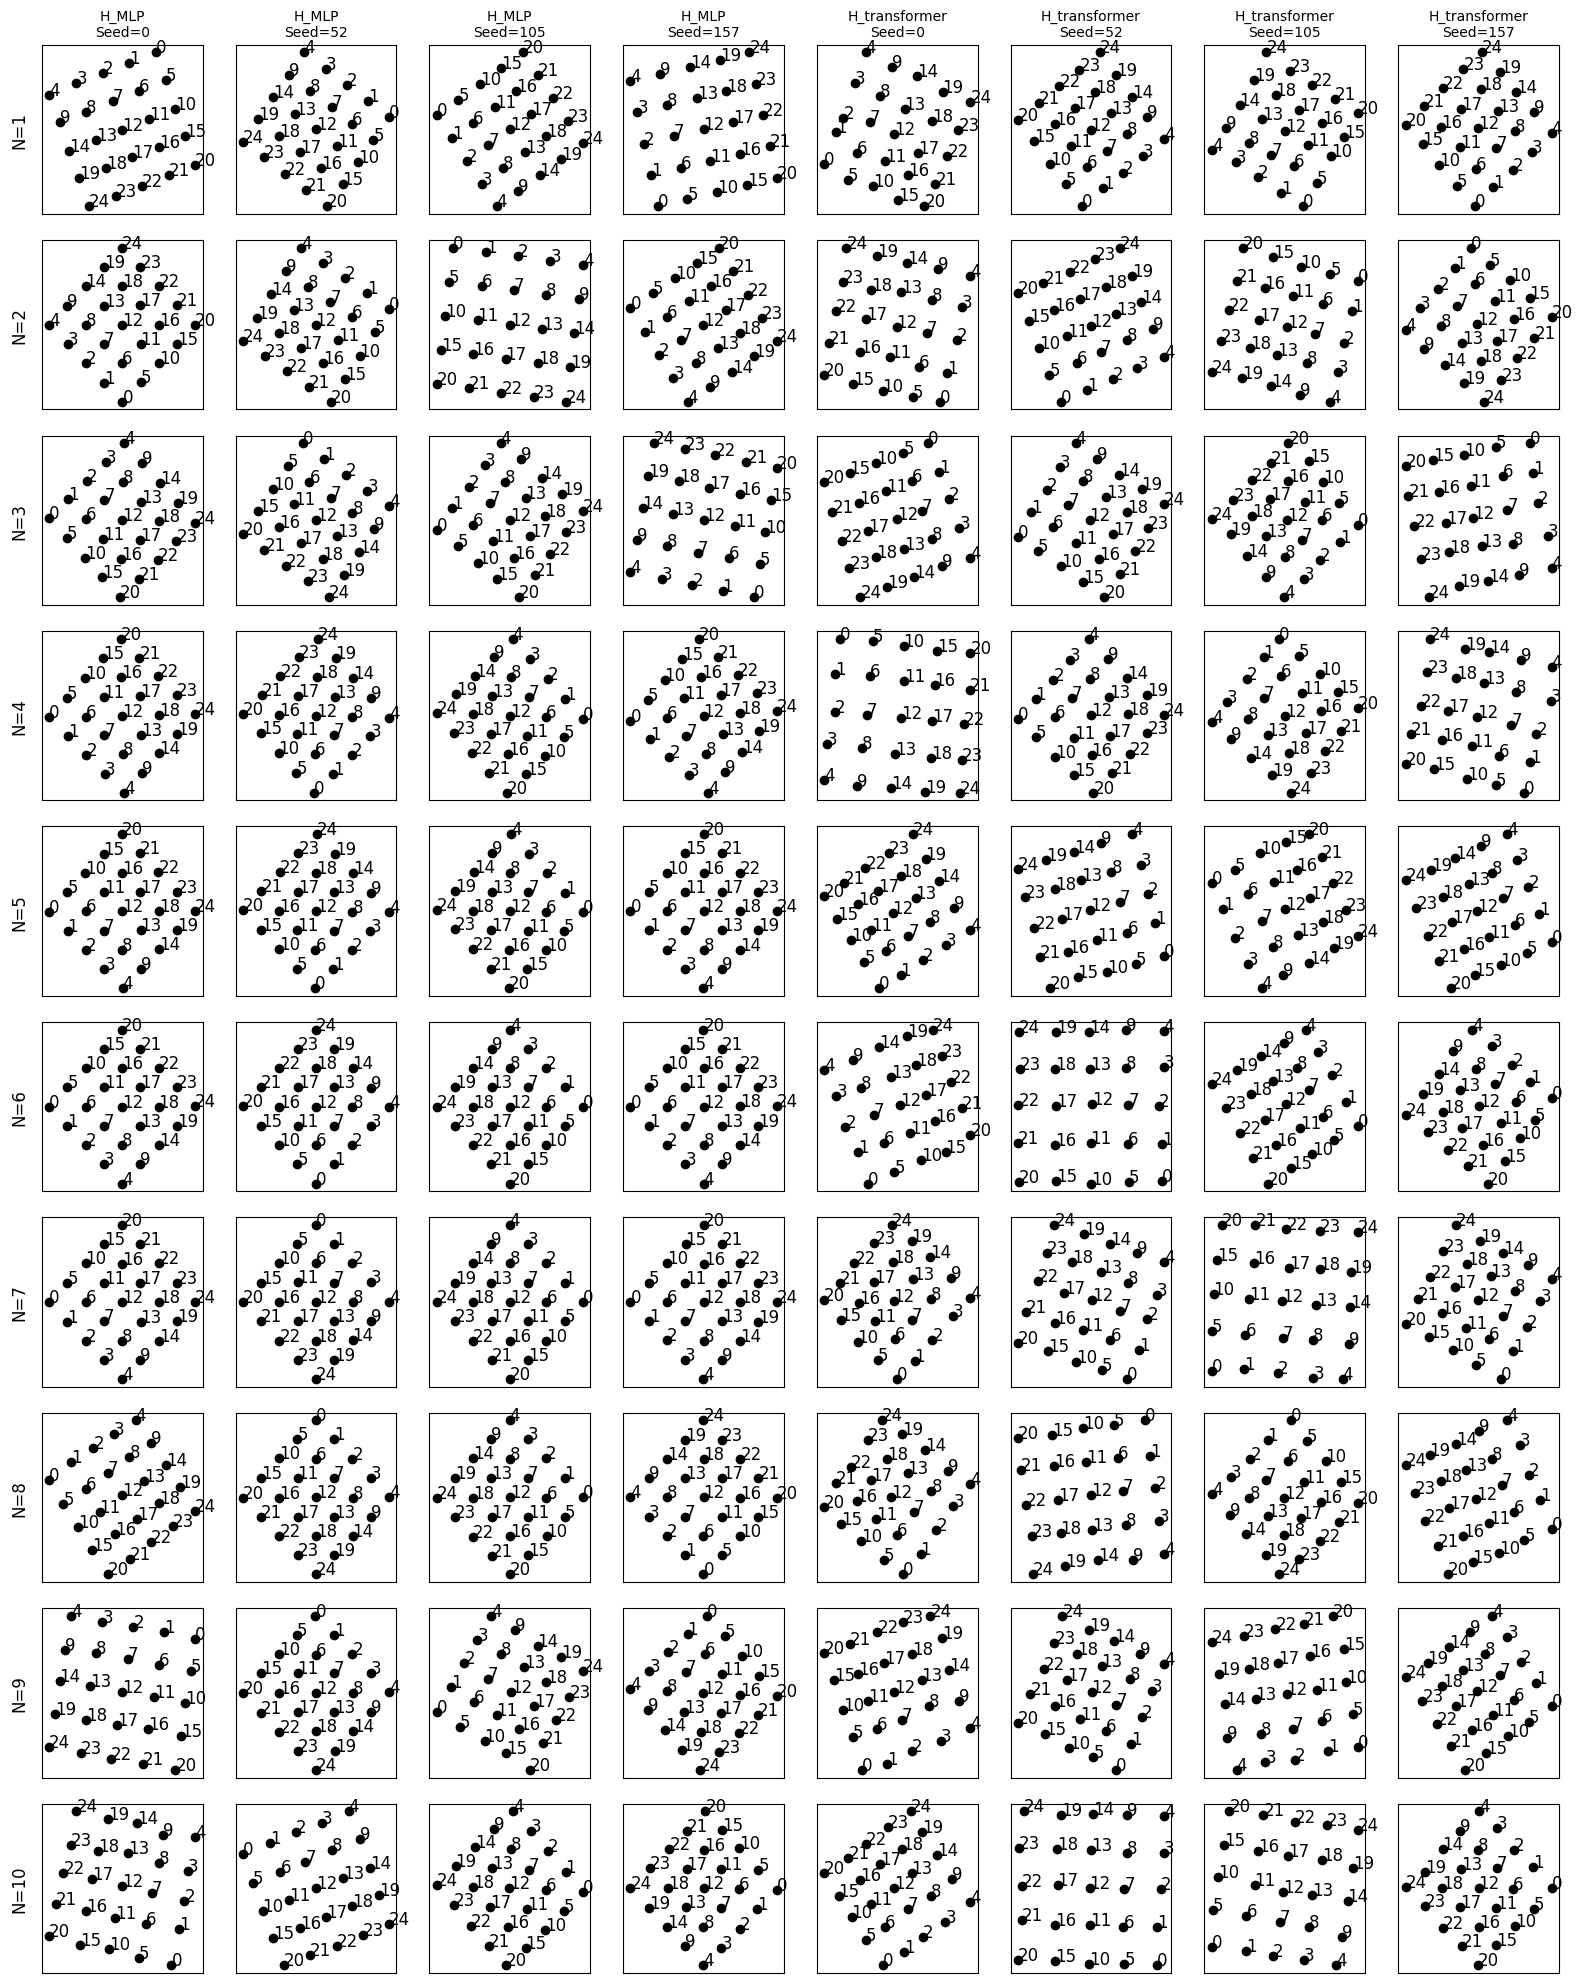

In [94]:

# User parameters
base_directory = "results_n_exps"  # Update this path
dataset_choice = "lattice"  # or "circle"
n_values = list(range(1, 11))
model_types = ["H_MLP", "H_transformer"] # , "standard_MLP", "standard_transformer"]

process_and_visualize(base_directory, dataset_choice, n_values, model_types)

harmonic
Explained Variance Ratio [0.5060519 0.4939436]
harmonic
Explained Variance Ratio [0.30179483 0.29215458]
harmonic
Explained Variance Ratio [0.50885135 0.49114507]
harmonic
Explained Variance Ratio [0.29971737 0.2914061 ]
harmonic
Explained Variance Ratio [0.33821017 0.31840193]
harmonic
Explained Variance Ratio [0.17017664 0.13303263]
harmonic
Explained Variance Ratio [0.18420112 0.16786112]
harmonic
Explained Variance Ratio [0.39106598 0.2681111 ]
harmonic
Explained Variance Ratio [0.32679915 0.3200325 ]
harmonic
Explained Variance Ratio [0.33008254 0.3042077 ]
harmonic
Explained Variance Ratio [0.20572741 0.20042096]
harmonic
Explained Variance Ratio [0.34276018 0.32208624]
harmonic
Explained Variance Ratio [0.30578586 0.2749454 ]
harmonic
Explained Variance Ratio [0.3379228  0.22580849]
harmonic
Explained Variance Ratio [0.32223678 0.28173116]
harmonic
Explained Variance Ratio [0.47297305 0.39747092]
harmonic
Explained Variance Ratio [0.37105244 0.35427648]
harmonic
Explain

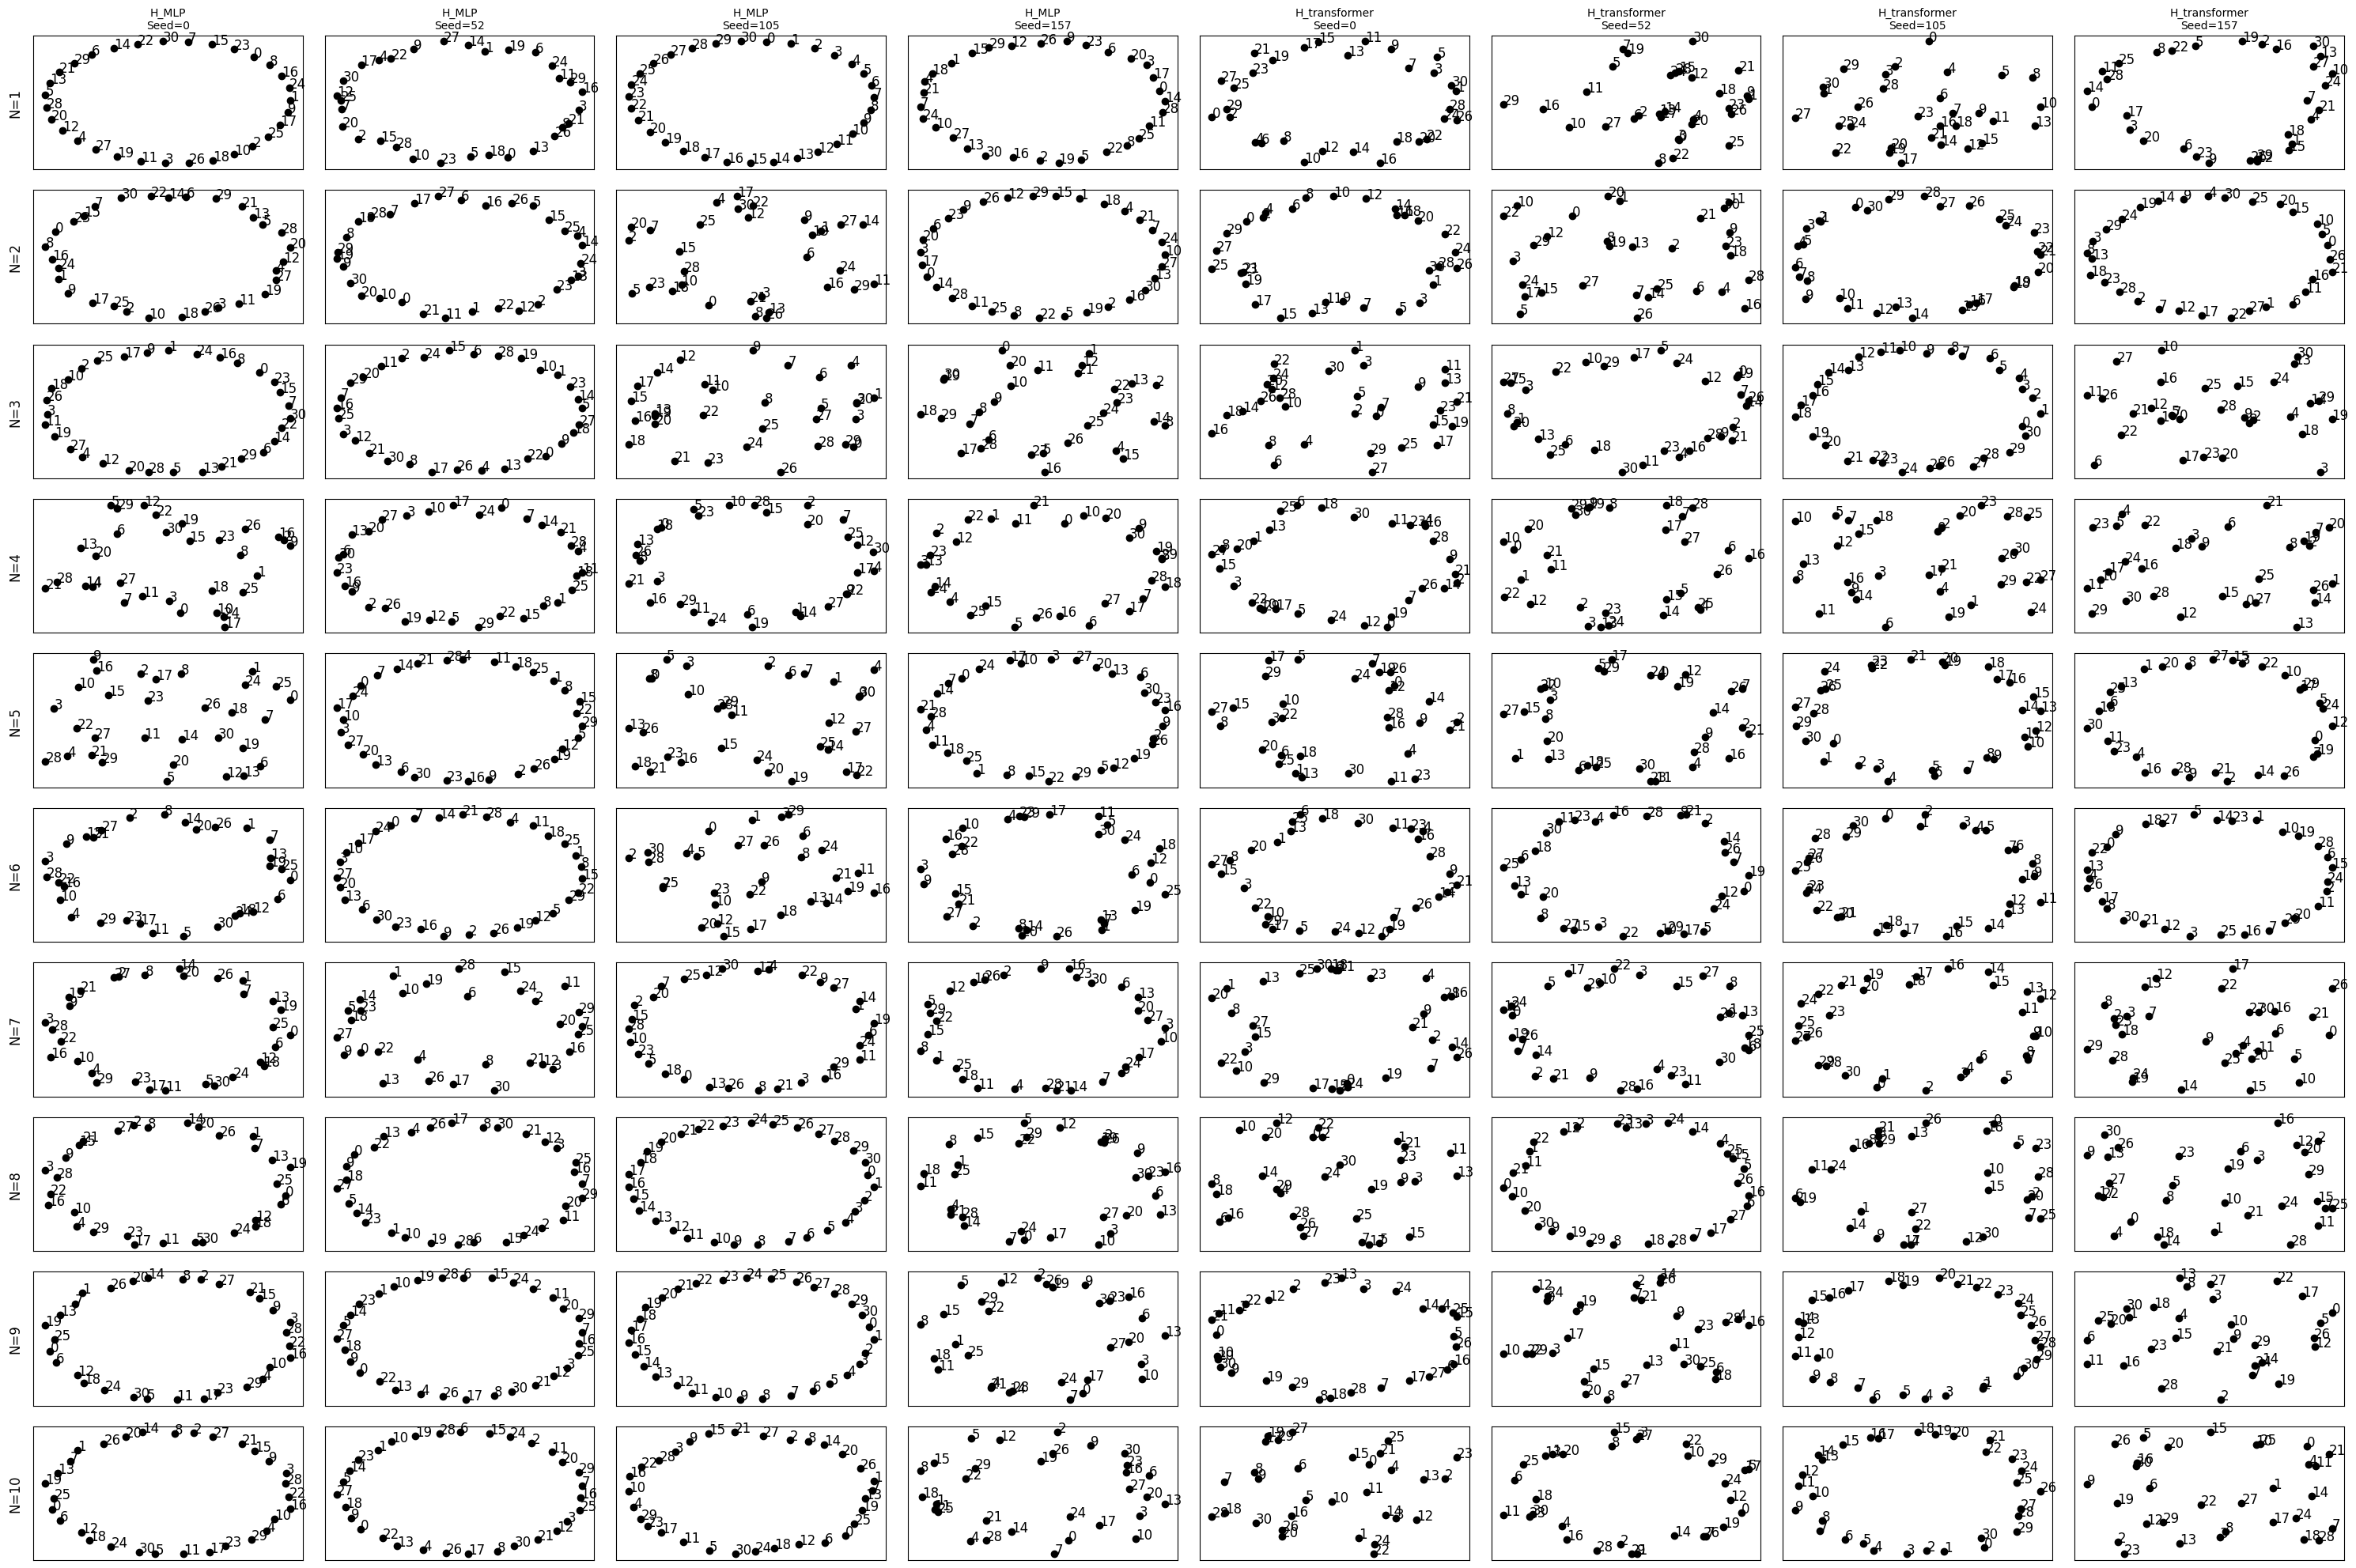

In [6]:

# User parameters
base_directory = "results_n_exps"  # Update this path
dataset_choice = "circle"  # or "circle"
n_values = list(range(1, 11))
model_types = ["H_MLP", "H_transformer"] # , "standard_MLP", "standard_transformer"]

process_and_visualize(base_directory, dataset_choice, n_values, model_types)

# Grokking Plots

## Loss Functions Plot

In [81]:
def get_latest_model_folder(base_path, dataset, model_type):
    # Updated to include loss_function as a part of the folder name pattern
    pattern = re.compile(rf"(\d{{4}}-\d{{2}}-\d{{2}}_\d{{2}}-\d{{2}}-\d{{2}}-\d{{2}})-{dataset}-{model_type}")
    latest_time = None
    latest_folder = None
    
    for folder in os.listdir(f"../{base_path}"):
        match = pattern.match(folder)
        if match:
            timestamp = match.group(1)
            if latest_time is None or timestamp > latest_time:
                latest_time = timestamp
                latest_folder = folder
    
    return latest_folder

def process_and_visualize(base_path, dataset, loss_functions, model_types, harmonic_base_path="results_n_exps/1"):
    # Update to use 4 rows (one for each loss function) and 8 columns (4 for each model type)
    fig, axes = plt.subplots(nrows=len(loss_functions), ncols=len(model_types) * 4, figsize=(32, 20))
    seed_values = [0, 52, 105, 157]
    
    for l_idx, loss_function in enumerate(loss_functions):
        for m_idx, model_type in enumerate(model_types):
            for s_idx, seed in enumerate(seed_values):
                # Special case for "harmonic" loss function
                if loss_function == "harmonic" and harmonic_base_path:
                    model_base_path = harmonic_base_path
                    latest_folder = get_latest_model_folder(f"{model_base_path}", dataset, model_type)
                    if latest_folder:
                        model_path = os.path.join(model_base_path, latest_folder)
                else:
                    model_base_path = base_path
                
                    # Get the latest folder for the current model type and loss function
                    latest_folder = get_latest_model_folder(f"{model_base_path}/{loss_function}", dataset, model_type)
                    if latest_folder:
                        model_path = os.path.join(model_base_path, loss_function, latest_folder)
                
                if latest_folder:
                    model = load_model_from_file(model_type, dataset, seed=seed, 
                                                 results_root=f"{model_path}", 
                                                 trained_on_gpu=False, n_in_filename=True, n_exp=1)
                    emb = model.embedding.weight.cpu() if 'transformer' in model_type else model.embedding.cpu()
                    
                    # Plot embeddings
                    ax = axes[l_idx, m_idx * 4 + s_idx]  # Adjust column index to handle 8 columns
                    ax.set_xticks([])  # Hide x-axis ticks
                    ax.set_yticks([])  # Hide y-axis ticks
                    plt.sca(ax)  # Set the current subplot before plotting
                    visualize_embedding(emb, title="", save_path=None, 
                                        dict_level=None, color_dict=True, adjust_overlapping_text=False)
    
    # Add labels for rows (loss functions)
    for l_idx, loss_function in enumerate(loss_functions):
        axes[l_idx, 0].set_ylabel(f"{loss_function}", fontsize=12, rotation=90, labelpad=10)
    
    # Add titles for columns (model types and seeds)
    for m_idx, model_type in enumerate(model_types):
        for s_idx, seed in enumerate(seed_values):
            axes[0, m_idx * 4 + s_idx].set_title(f"{model_type}\nSeed={seed}", fontsize=10)
    
    # Set labels for x-axis: seed and model type
    # for ax in axes[-1, :]:
    #     ax.set_xlabel('Seed and Model Type', fontsize=12)
    
    # Adjust size for better layout
    plt.gcf().set_size_inches((20, 8))
    plt.tight_layout()
    plt.show()


harmonic
Explained Variance Ratio [0.26044875 0.18360378]
harmonic
Explained Variance Ratio [0.22699696 0.15638812]
harmonic
Explained Variance Ratio [0.28010607 0.15909973]
harmonic
Explained Variance Ratio [0.2777506  0.13488321]
harmonic
Explained Variance Ratio [0.46440652 0.45778933]
harmonic
Explained Variance Ratio [0.48103425 0.46231836]
harmonic
Explained Variance Ratio [0.47619095 0.44662893]
harmonic
Explained Variance Ratio [0.47517163 0.44860095]
harmonic
Explained Variance Ratio [0.17074542 0.16966222]
harmonic
Explained Variance Ratio [0.4659458  0.23237948]
harmonic
Explained Variance Ratio [0.54981697 0.32245356]
harmonic
Explained Variance Ratio [0.1593481  0.13319916]
harmonic
Explained Variance Ratio [9.9650407e-01 7.6408411e-04]
harmonic
Explained Variance Ratio [9.9646968e-01 7.8136916e-04]
harmonic
Explained Variance Ratio [9.963695e-01 8.738647e-04]
harmonic
Explained Variance Ratio [9.958569e-01 8.279376e-04]
harmonic
Explained Variance Ratio [0.33821017 0.3184

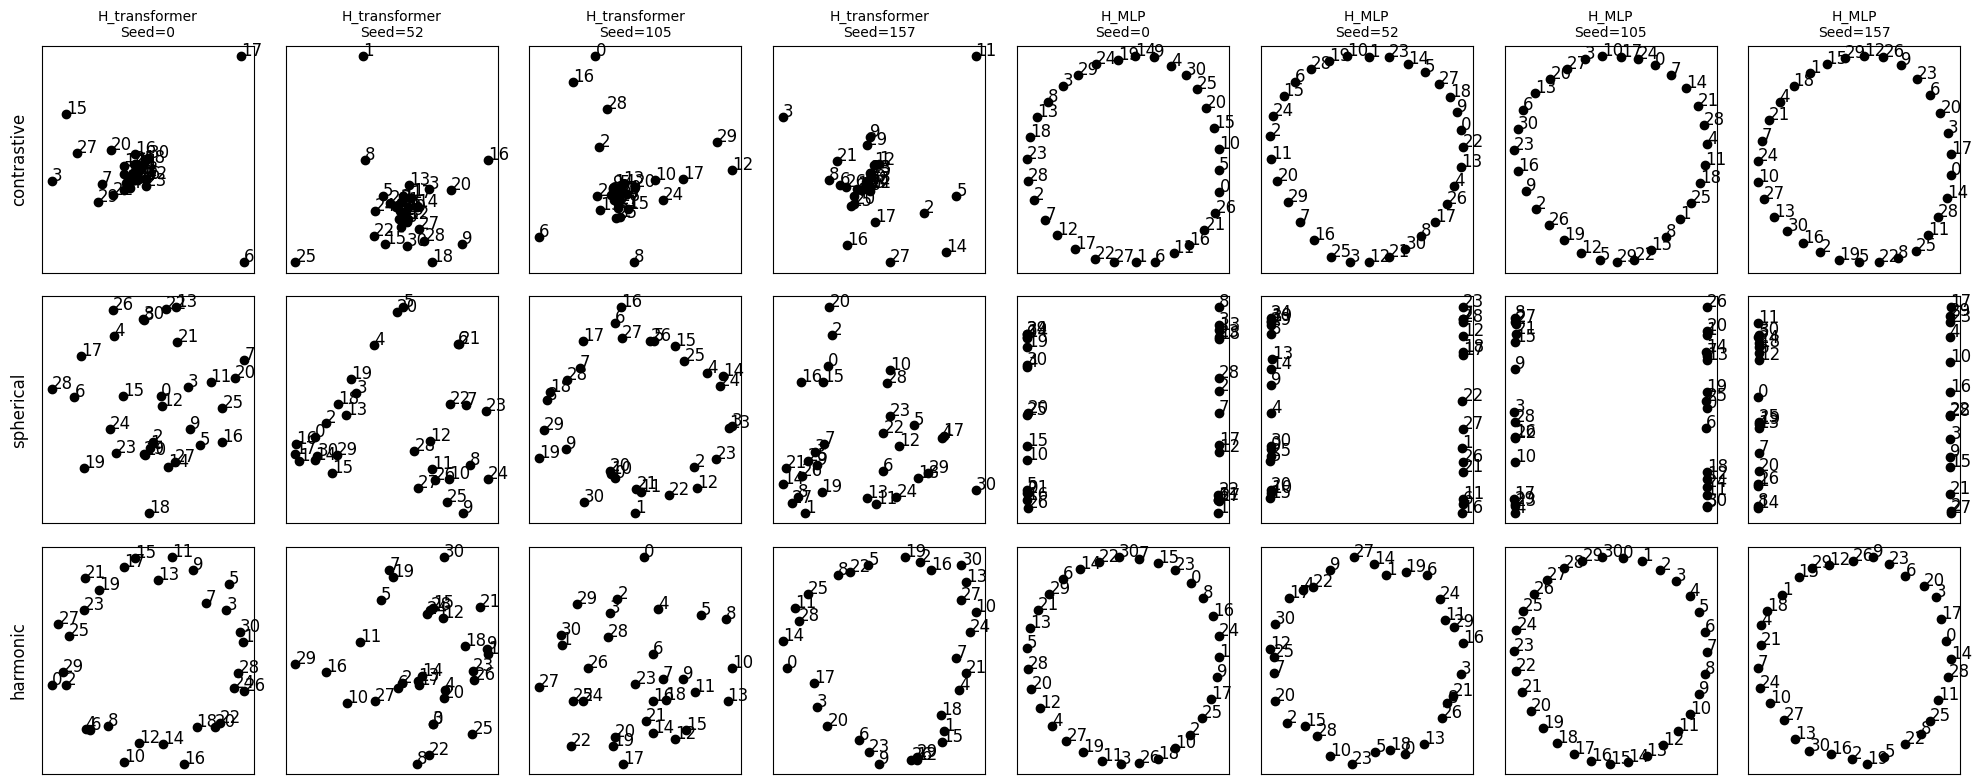

In [84]:

# Example of usage
loss_functions = ['contrastive', 'spherical', 'harmonic']
model_types = ['H_transformer', 'H_MLP']
process_and_visualize(base_path='results_loss_exps', dataset='circle', 
                      loss_functions=loss_functions, model_types=model_types)
